<a href="https://colab.research.google.com/github/ancka019/data_analysis-/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
import os
import geopandas as gpd
import contextily as ctx

In [ ]:
df = pd.read_csv('/data.csv', encoding='cp1251');

In [ ]:
df.shape

(4600, 18)

In [ ]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


Пример 1. Проверка нормальности распределения


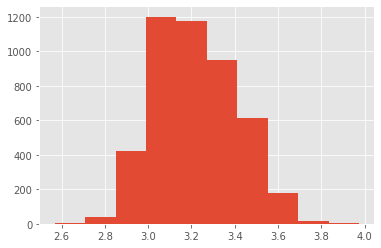

In [ ]:
plt.hist(np.log10(df['sqft_above']));

In [ ]:
res = stats.shapiro(np.log10(df[u'sqft_above']));
print('p-value: ', res[1]);

p-value:  3.364510157700647e-17


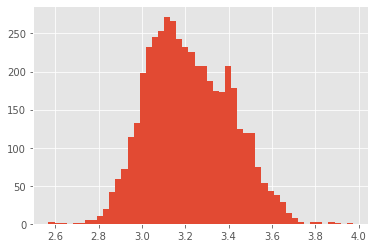

In [ ]:
plt.hist(np.log10(df['sqft_above']), bins = 50);

Пример 2. Критерий Манна-Уитни и корреляция Пирсона.


In [ ]:
x = df[df['yr_renovated'] == 0]['price']
y = df[df['yr_renovated'] != 0]['price']
x.name, y.name = 'yr_renovated not ', 'yr_renovated yes'

In [ ]:
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

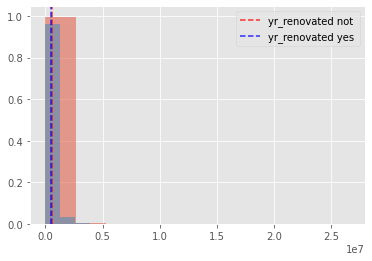

In [ ]:
two_histograms(x, y)

In [ ]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 3.5614669174690228e-06


In [ ]:
df3 = pd.read_csv('/content/raw_sales.csv', encoding='cp1251');

In [ ]:
df3

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


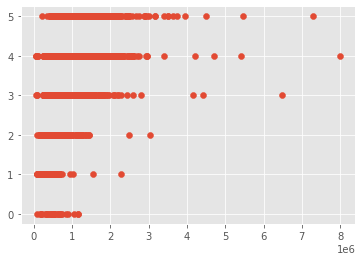

In [ ]:
plt.scatter(df3['price'], df3['bedrooms'])
plt.show()

In [ ]:
res = stats.pearsonr(df3['price'], df3['bedrooms'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.48421174303285064
p-value:  0.0


In [ ]:
res = stats.pearsonr(df['price'], df['sqft_above'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.3675696016004257
p-value:  3.808299028742957e-147


In [ ]:
df2 = pd.read_csv('/content/moscow_stats.csv', encoding='cp1251');

In [ ]:
df2.head()

,ID,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalPopulationThisYear
0,1,2010,January,9206,4785,4421,10430,4997,3302,1241,95,491,11503501
1,2,2010,February,9060,4656,4404,9573,4873,2937,1326,97,639,11503501
2,3,2010,March,10934,5630,5304,10528,3642,4361,1644,147,717,11503501
3,4,2010,April,10140,5278,4862,9501,9698,3943,1530,128,642,11503501
4,5,2010,May,9457,4825,4632,9482,3726,3554,1397,96,492,11503501


In [ ]:
x = df2['NumberOfBirthCertificatesForBoys']
y = df2['NumberOfBirthCertificatesForGirls']
x.name, y.name = 'boys', 'girls'

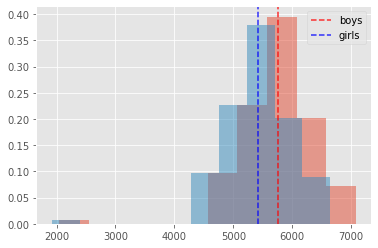

In [ ]:
two_histograms(x, y)

In [ ]:
res = stats.mannwhitneyu(x, y)
print('p-value: ', res[1])


p-value:  1.2714924534733437e-07


In [ ]:
x = df2['StateRegistrationOfBirth']
y = df2['StateRegistrationOfDeath']
x.name, y.name = 'birth', 'death'

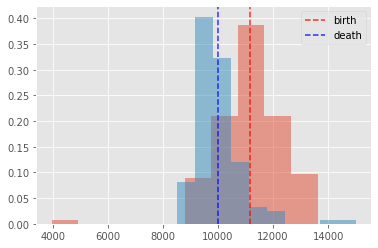

In [ ]:
two_histograms(x, y)

In [ ]:
res = stats.mannwhitneyu(x, y)
print('p-value: ', res[1])

p-value:  2.4496295267104787e-20


In [ ]:
birth2019 = df2[df2['Year'] == 2019]['StateRegistrationOfBirth']
birth2019

108    10953
109    10400
110    11392
111    11161
112    11821
113    11862
114    13056
115    13053
116    11216
117    11640
118    10472
119    10329
Name: StateRegistrationOfBirth, dtype: int64

In [ ]:
birth2011 = df2[df2['Year'] == 2011]['StateRegistrationOfBirth']
birth2011

12     9135
13     9302
14    10818
15     9407
16     9091
17    10646
18    11358
19    12094
20    10608
21    10568
22    11109
23    10922
Name: StateRegistrationOfBirth, dtype: int64

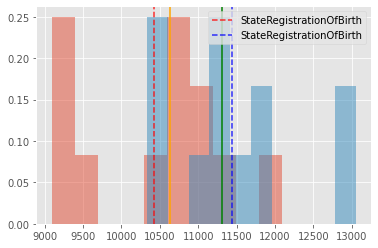

In [ ]:
two_histograms(birth2011, birth2019)
plt.axvline(birth2011.median(),color='orange', alpha=1),
plt.axvline(birth2019.median(),color='green', alpha=1)

In [ ]:
res = stats.wilcoxon(birth2011, birth2019)
print('p-value: ', res[1])

p-value:  0.009632975772588674


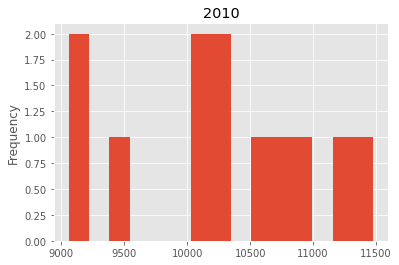

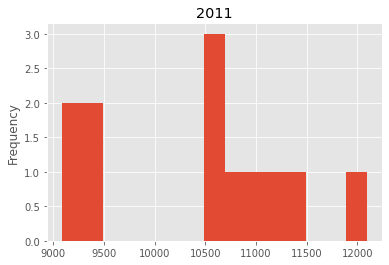

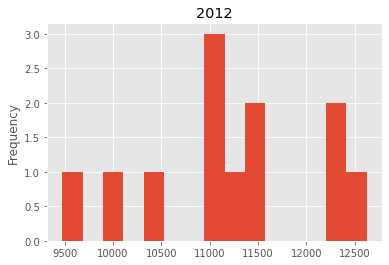

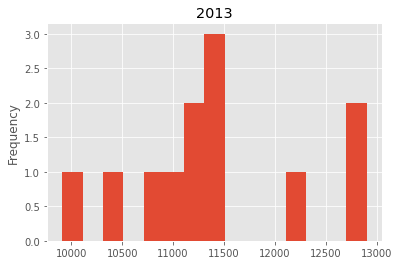

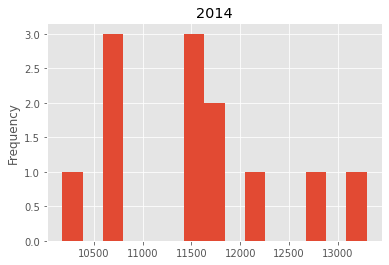

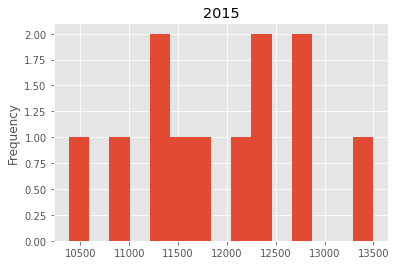

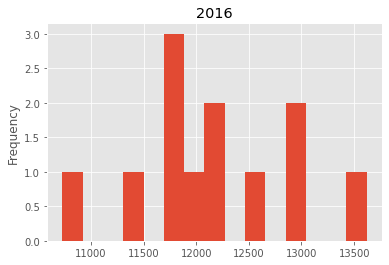

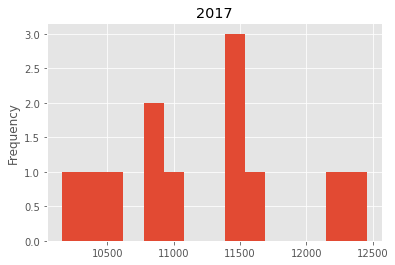

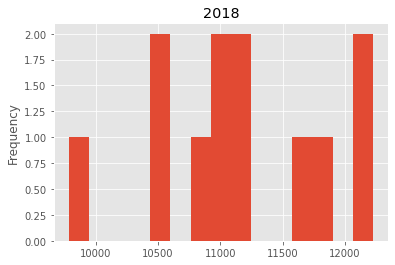

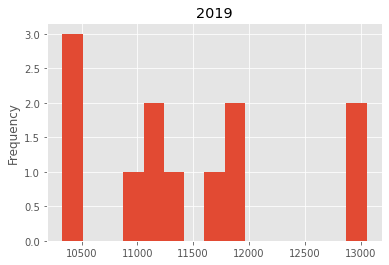

In [ ]:
for i in range(2010,2020):
    df2[df2['Year'] == i]['StateRegistrationOfBirth'].plot.hist(bins = 15, title = i)
    plt.show()

In [ ]:
df2.groupby('Year')['StateRegistrationOfBirth'].median().sort_values()

Year
2020     9509.0
2010    10297.5
2011    10627.0
2018    11127.0
2017    11212.0
2012    11222.5
2013    11284.5
2019    11304.0
2014    11534.0
2015    11974.0
2016    12071.5
Name: StateRegistrationOfBirth, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


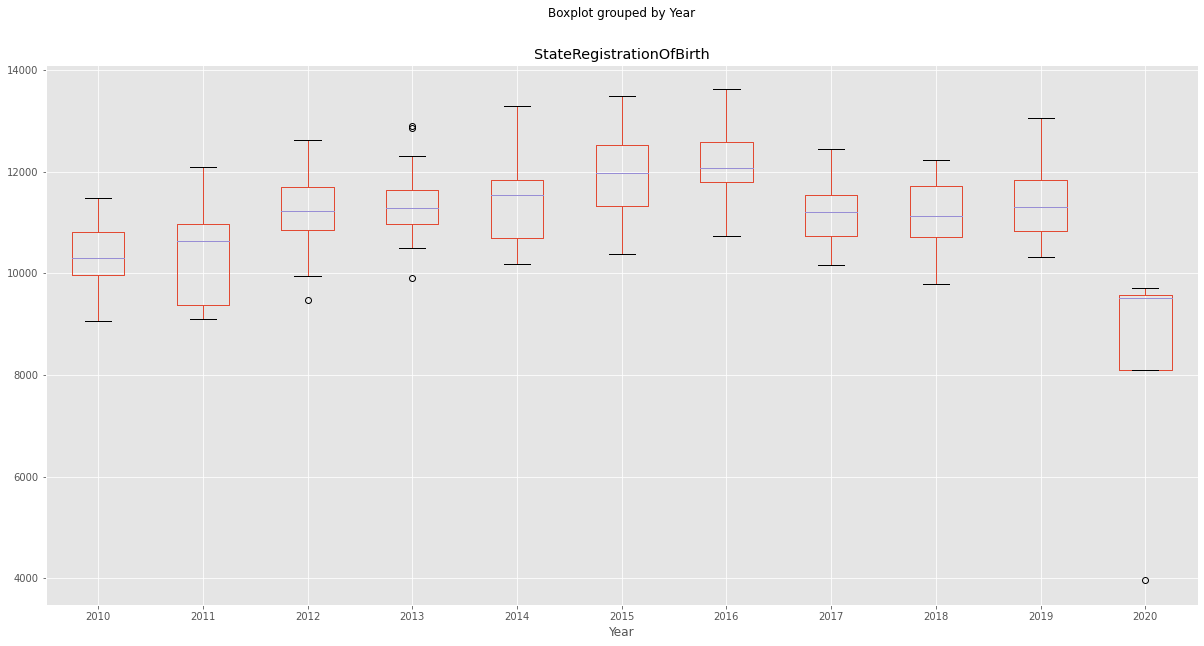

In [ ]:
df2.boxplot(figsize=(20,10), column='StateRegistrationOfBirth', by = 'Year')
plt.show()

In [ ]:
df3 = pd.read_csv('/content/russian_demography.csv', encoding='cp1251');
df3

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [ ]:
urban1990 = df3[(df3['year'] == 1999) & (df3['urbanization'] < 100) ]['urbanization']
urban2017 = df3[(df3['year'] == 2017) & (df3['urbanization'] < 100) ]['urbanization']

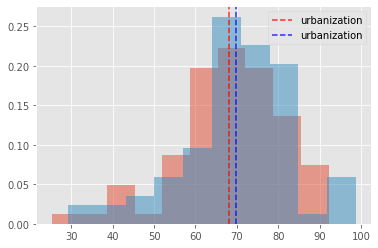

In [ ]:
two_histograms(urban1990, urban2017)

In [ ]:
res = stats.shapiro(urban1990)
print('p-value: ', res[1])

p-value:  0.01995268650352955


In [ ]:
res = stats.shapiro(urban2017)
print('p-value: ', res[1])

p-value:  0.02265014499425888


In [ ]:
res = stats.fligner(urban1990, urban2017)
print('p-value: ', res[1])

p-value:  0.8980787576106686
